**Table of contents**<a id='toc0_'></a>    
- 1. [Imports](#toc1_)    
- 2. [Model class](#toc2_)    
- 3. [Quesitions](#toc3_)   

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Imports](#toc0_)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})
from scipy import optimize
from scipy.optimize import minimize
import scipy.stats
from ExchangeEconomy import *

model = ExchangeEconomyClass()
par = model.par

%load_ext autoreload
%autoreload 2

## 2. <a id='toc2_'></a>[Model class](#toc0_)

In [3]:
from ExchangeEconomy import ExchangeEconomyClass

alpha = 1/3
beta = 2/3

In [32]:
model = ExchangeEconomyClass()

## 3. <a id='toc3_'></a>[Questions](#toc0_)

Question 1

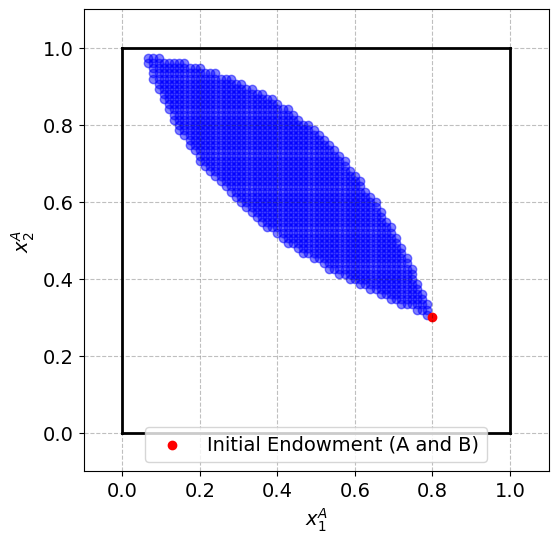

In [34]:
# a. total endowment
w1bar = 1.0
w2bar = 1.0


# Initial endowments
w_A1, w_A2 = 0.8, 0.3  # Initial endowment for Agent A
w_B1, w_B2 = 1-w_A1, 1-w_A2  # Initial endowment for Agent B



# Calculate utility at initial endowments
u_A_initial = model.utility_A(w_A1, w_A2)
u_B_initial = model.utility_B(w_B1, w_B2)

# b. figure set up for Edgeworth Box
fig = plt.figure(frameon=False, figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

ax_A.set_xlim([0, 1])
ax_A.set_ylim([0, 1])

N = 75
x_A1_range = np.linspace(0, 1, N+1)
x_A2_range = np.linspace(0, 1, N+1)

# Plot feasible allocations satisfying utility conditions
for x_A1 in x_A1_range:
    for x_A2 in x_A2_range:
        x_B1 = 1 - x_A1
        x_B2 = 1 - x_A2
        
        # Check if both agents' utility conditions are met
        if model.utility_A(x_A1, x_A2) >= u_A_initial and model.utility_B(x_B1, x_B2) >= u_B_initial:
            ax_A.scatter(x_A1, x_A2, color='blue', alpha=0.5)

# Highlight initial endowments
            
# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    


ax_A.scatter(w_A1, w_A2, color='red', label='Initial Endowment (A and B)')
ax_A.legend()

plt.grid(True)
plt.show()

It is seen that with the initial endowment the corresponding allocation is shown with the red dot. The set C is shown by the blue area.

Question 2

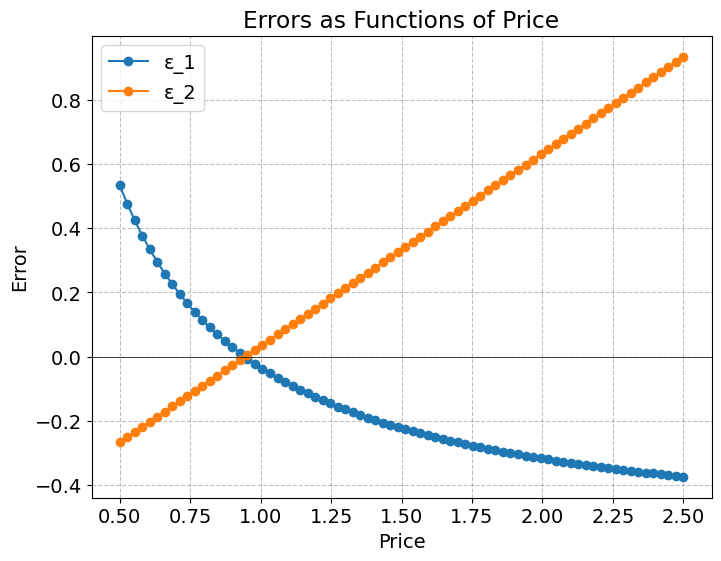

In [37]:
# Price vector
N = 75
p1_values = np.array([0.5 + 2*i/N for i in range(N+1)]).reshape(1, -1)

# Calculating error in the market clearing
epsilon1 = []
epsilon2 = []
p_1 = []

for p1 in p1_values.flatten():
    demand_A1, demand_A2 = model.demand_A(p1)     
    demand_B1, demand_B2 = model.demand_B(p1)     
    
    epsilon1.append(demand_A1 - w_A1 + demand_B1 - w_B1)
    epsilon2.append(demand_A2 - w_A2 + demand_B2 - w_B2)
    p_1.append(p1)

# Results
# print("p1 values:", p1_values)
# print("Epsilon1:", epsilon1)
# print("Epsilon2:", epsilon2)

plt.figure(figsize=(8, 6))
plt.plot(p_1, epsilon1, label='ε_1', marker='o')
plt.plot(p_1, epsilon2, label='ε_2', marker='o')
plt.xlabel('Price')
plt.ylabel('Error')
plt.title('Errors as Functions of Price')
plt.axhline(0, color='black', linewidth=0.5)
plt.legend()
plt.grid(True)
plt.show()


Opgave 3

In [35]:
p1_eq = model.find_equilibrium_price()
print(f"Equilibrium price p1: {p1_eq}")

x_A1_star_MC, x_A2_star_MC = np.clip(model.demand_A(p1_eq), 0, 1)
x_B1_star_MC, x_B2_star_MC = np.clip(model.demand_B(p1_eq), 0, 1)


# Market clearing allocation
optimal_allocation_A_MC = (x_A1_star_MC, x_A2_star_MC)
optimal_allocation_B_MC = (x_B1_star_MC, x_B2_star_MC)


print("Optimal A:", optimal_allocation_A_MC)
print("Optimal B:", optimal_allocation_B_MC)


Equilibrium price p1: 0.9444444444444471
Optimal A: (0.37254901960784287, 0.7037037037037053)
Optimal B: (0.6274509803921553, 0.29629629629629645)


Opgave 4.a

In [38]:
optimal_utility = -float('inf')
optimal_p1 = None
optimal_allocation_A = (None, None)
optimal_allocation_B = (None, None)

for p1 in p1_values.flatten():
    # Find x for price
    xA1_star, xA2_star = model.demand_A(p1)
    xB1_star, xB2_star = model.demand_B(p1)
    
    # Checking if allocations are geq 0 and leq 1
    if 0 <= xA1_star <= 1 and 0 <= xA2_star <= 1 and 0 <= xB1_star <= 1 and 0 <= xB2_star <= 1:
        # Utility for A
        utility = model.utility_A(xA1_star, xA2_star)
        
        # Checking if this utility is better than best so far found
        if utility > optimal_utility:
            optimal_utility = utility
            optimal_p1 = p1
            optimal_allocation_A_4a = (xA1_star, xA2_star)
            optimal_allocation_B_4a = (xB1_star, xB2_star)

print("Optimal Price for Consumer A:", optimal_p1)
print("Optimal Utility of Consumer A:", optimal_utility)
print("Optimal A:", optimal_allocation_A_4a)
print("Optimal B:", optimal_allocation_B_4a)


Optimal Price for Consumer A: 1.4866666666666668
Optimal Utility of Consumer A: 1.6890292152816206
Optimal A: (0.3339312406576981, 0.9928888888888892)
Optimal B: (0.44723467862481303, 0.33244444444444443)


Opgave 4.b

In [42]:
initial_guess = [1]

# Performing the optimization
initial_guess = [1]

# Minimizing with speciifed arguments
result = minimize(
    fun=model.objective_function,
    x0=initial_guess,
    args=(alpha, w_A1, w_A2, 1),
    bounds=[(0,5)],
    method='SLSQP'
)

if result.success:
    optimal_p1 = result.x[0]
    print(f"Optimal price p1: {optimal_p1}")
else:
    print("Optimization was unsuccessful:", result.message)

optimal_p1_continuous = result.x[0]

# Calculating the optimal allocations based on the found p1
optimal_xA1_4b, optimal_xA2_4b = np.clip(model.demand_A(optimal_p1_continuous), 0, 1)
optimal_xB1_4b, optimal_xB2_4b = np.clip(model.demand_B(optimal_p1_continuous), 0, 1)

optimal_p1_continuous, (optimal_xA1_4b, optimal_xA2_4b), (optimal_xB1_4b, optimal_xB2_4b)


optimal_allocation_A_4b = (optimal_xA1_4b, optimal_xA2_4b)
optimal_allocation_B_4b = (optimal_xB1_4b, optimal_xB2_4b)


print("Optimal A:", optimal_allocation_A_4b)
print("Optimal B:", optimal_allocation_B_4b)

Optimal price p1: 5.0
Optimal A: (0.2866666666666666, 1.0)
Optimal B: (0.22666666666666663, 0.5666666666666667)


The found price here in theory goes to infinity for some reason, thus we have limited it to reasonable values, although it will take on the maximum value possible. The results show that when A has the power to set any positive price he/she will set a price such that he/she gets maximum of good 2. 

Opgave 5.a

In [43]:
optimal_utility = -float('inf')
optimal_p1 = None
optimal_allocation_A = (None, None)
optimal_allocation_B = (None, None)

for x1 in x_A2_range:
    for x2 in x_A2_range:
        utility_A = model.utility_A(x1, x2)
        utility_B = model.utility_B(1-x1, 1-x2)

        p1_star = (w_A2)/(x_A1-alpha*w_A1)
        
        if utility_A >= u_A_initial and utility_B >= u_B_initial:
            optimal_utility = utility_A
            optimal_utility_B = model.utility_B(1-x1,1-x2)
            optimal_p1 = p1_star
            optimal_allocation_A_5a = (x1,x2)
            optimal_allocation_B_5a = (1-x1,1-x2)

print("Optimal Price for Consumer A:", optimal_p1)
print("Optimal Utility of Consumer A:", optimal_utility)
print("Optimal Utility of Consumer B:", optimal_utility_B)
print("Optimal A: allocation", optimal_allocation_A_5a)
print("Optimal B: allocation", optimal_allocation_B_5a)

Optimal Price for Consumer A: 0.40909090909090906
Optimal Utility of Consumer A: 1.4038813825040304
Optimal Utility of Consumer B: 1.2306113714467892
Optimal A: allocation (0.7866666666666667, 0.33333333333333337)
Optimal B: allocation (0.21333333333333326, 0.6666666666666666)


Opgave 5.b

In [47]:
# Defining constraint
def constraint_B(x):
        x_A1, x_A2 = x
        x_B1, x_B2 = 1 - x_A1, 1 - x_A2 
        return x_B1**beta * x_B2**(1-beta) - u_B_initial

cons = [{'type': 'ineq', 'fun': constraint_B}] 
bounds = [(0, 1), (0, 1)] 

x0 = [w_A1, w_A2]

# minimizing with given constraints
result = minimize(
    fun=model.objective_A,
    x0=x0,
    constraints=cons,
    bounds=bounds,
)

p1_star = (w_A2)/(x_A1-alpha*w_A1)
optimal_utility = model.utility_A(x_A1,x_A2)
optimal_utility_B = model.utility_B(1-x_A1,1-x_A2)
optimal_allocation_A_5b = (x_A1,x_A2)
optimal_allocation_B_5b = (1-x_A1,1-x_A2)

print("Optimal Price:", optimal_p1)
print("Optimal Utility of Consumer A:", optimal_utility)
print("Optimal Utility of Consumer B:", optimal_utility_B)
print("Optimal A: allocation", optimal_allocation_A_5b)
print("Optimal B: allocation", optimal_allocation_B_5b)



Optimal Price: 0.40909090909090906
Optimal Utility of Consumer A: 2.0
Optimal Utility of Consumer B: 0.0
Optimal A: allocation (1.0, 1.0)
Optimal B: allocation (0.0, 0.0)


Opgave 6.a

In [45]:
x0 = [0.5, 0.5]

result = minimize(
    fun=model.aggregate_utility,
    x0=x0,
    bounds=bounds,
)

if result.success:
    optimal_xA1, optimal_xA2 = result.x
    optimal_xB1, optimal_xB2 = 1 - optimal_xA1, 1 - optimal_xA2
else:
    print("Optimization failed:", result.message)

p1_star = (w_A2)/(optimal_xA1-alpha*w_A1)
optimal_utility = model.utility_A(optimal_xA1,optimal_xA2)
optimal_utility_B = model.utility_B(1-optimal_xA1,1-optimal_xA2)
optimal_allocation_A_6a = (optimal_xA1,optimal_xA2)
optimal_allocation_B_6a = (optimal_xB1,optimal_xB2)

print("Optimal Price for Consumer A:", optimal_p1)
print("Optimal Utility of Consumer A:", optimal_utility)
print("Optimal Utility of Consumer B:", optimal_utility_B)
print("Optimal A: allocation", optimal_allocation_A_6a)
print("Optimal B: allocation", optimal_allocation_B_6a)

Optimal Price for Consumer A: 0.40909090909090906
Optimal Utility of Consumer A: 1.4565040943625207
Optimal Utility of Consumer B: 1.456504105965816
Optimal A: allocation (0.3333333659693852, 0.6666666260640767)
Optimal B: allocation (0.6666666340306149, 0.3333333739359233)


Opgave 6.b

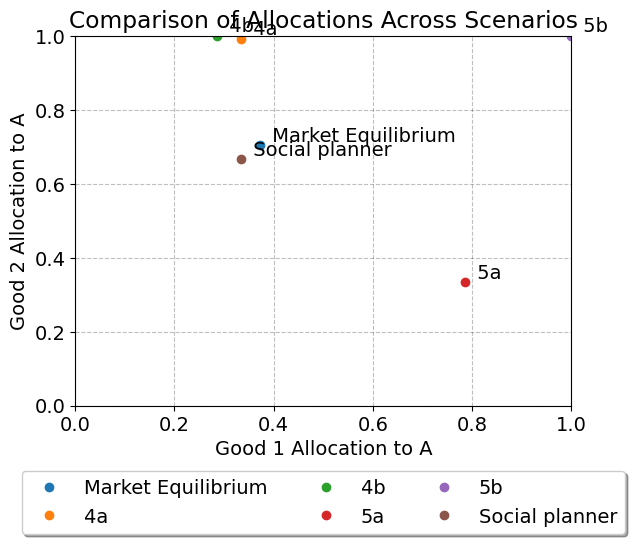

In [46]:

results = {
    "Market Equilibrium": optimal_allocation_A_MC,
    "4a": optimal_allocation_A_4a,
    "4b": optimal_allocation_A_4b,
    "5a": optimal_allocation_A_5a,
    "5b": optimal_allocation_A_5b,
    "Social planner": optimal_allocation_A_6a
}

fig, ax = plt.subplots()
for scenario, allocation in results.items():
    # Unpack the tuple directly
    x1A, x2A = allocation
    ax.plot(x1A, x2A, 'o', label=scenario)
    ax.text(x1A, x2A, f"  {scenario}", verticalalignment='bottom')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel("Good 1 Allocation to A")
ax.set_ylabel("Good 2 Allocation to A")
ax.set_title("Comparison of Allocations Across Scenarios")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fancybox=True, shadow=True)
plt.grid(True)
plt.show()

It is seen that the market equilibrium and the social planner equilibrium are fairly close. These also ensure the highest possible social utility. Equilibrium 4a and 4b are given in a case where consumer A has significant market power and can set a price that maximizes his/her own utility, disregarding the utility of consumer B. It is seen that these lie in a place where the allocation for 4b gives 1 of good 2 to consumer A and 4a gives almost 1 of good 2 to consumer a. 5a shows the allocation from set C as also shown in question 1, meanwhile 5b gives all of goods 1 and 2 to consumer A.

The pros of the market and social equilibrium is as stated that there is most possible social utility. The cases 4a 4b and 5b have the con of giving substantial market power to one consumer, although 5b shows the interesting case of allocating all goods to one consumer, actually creating not only an equilbrium but also a pareto equilibrium. Thus 5b suffers from the pro of creating a pareto equilbrium although the con being that the equilibrium only is positive for one consumer.

Opgave 7

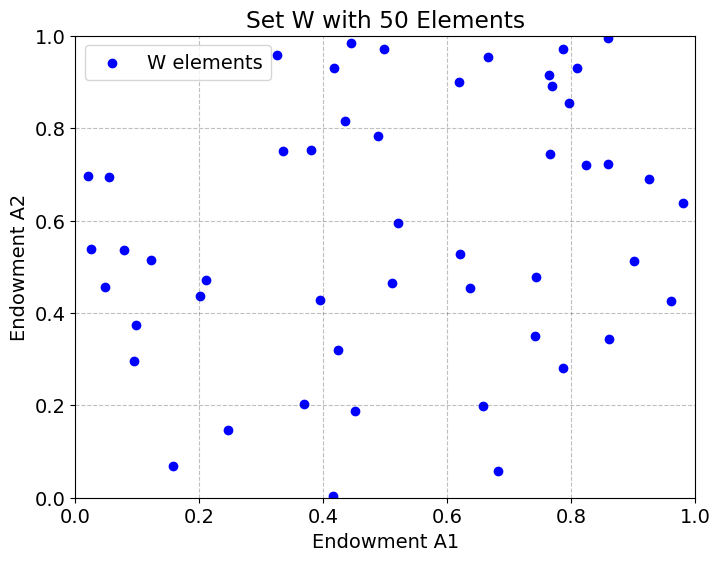

In [30]:

np.random.seed(52)

# Generating 50 random (wA1, wA2) pairs where wA1, wA2 ~ U(0,1)
w1A_values = np.random.uniform(0, 1, 50)
w2A_values = np.random.uniform(0, 1, 50)

plt.figure(figsize=(8, 6))
plt.scatter(w1A_values, w2A_values, color='blue', label='W elements')
plt.title('Set W with 50 Elements')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('Endowment A1')
plt.ylabel('Endowment A2')
plt.grid(True)
plt.legend()
plt.show()

Opgave 8

[0.53308034 0.82520955 0.40039886 0.58853179 0.8567386  0.79543971
 0.15727903 0.46139795 0.89504764 0.15320009 0.7472175  0.49863949
 0.9150224  0.23488081 0.15272195 0.80622398 0.75122796 0.92421828
 0.33650714 0.0448555  0.79511046 0.02660795 0.83441709 0.35725051
 0.35551303 0.20680123 0.56769645 0.48232612 0.58481645 0.65819884
 0.60462203 0.98073786 0.62184282 0.82793502 0.8381987  0.85874059
 0.20521762 0.49517039 0.27369636 0.87148515 0.44880011 0.26677671
 0.92282234 0.33474753 0.31563959 0.68258348 0.86804716 0.3792979
 0.21701479 0.88192337]
[0.16911687 0.52608358 0.86580593 0.42431206 0.19279014 0.4879786
 0.20571545 0.26245655 0.23872932 0.2593457  0.30268668 0.32916126
 0.07365616 0.34198571 0.0525465  0.31044353 0.22252879 0.67909895
 0.5583109  0.64565908 0.7718132  0.60894005 0.91963456 0.99517627
 0.81373515 0.26404982 0.22191999 0.82988857 0.74064228 0.77839802
 0.3230615  0.59734905 0.24831139 0.70156748 0.62797877 0.90233384
 0.93698781 0.31728311 0.70183588 0.1369

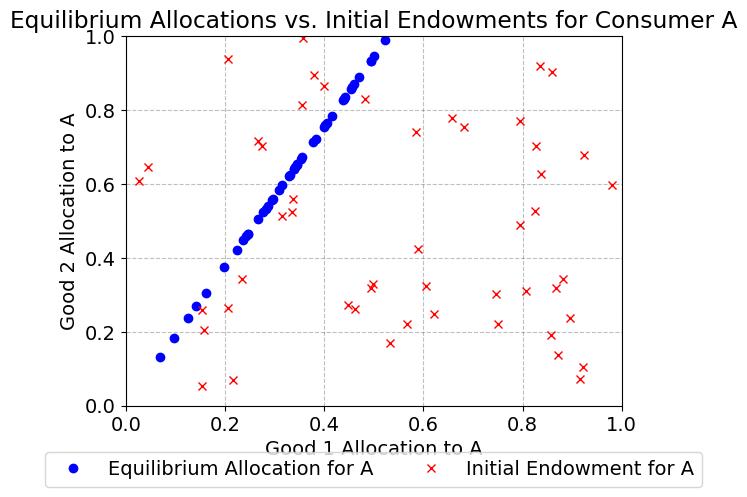

In [29]:

w1A_values = np.random.uniform(0, 1, 50)
w2A_values = np.random.uniform(0, 1, 50)

#print(w1A_values)
#print(w2A_values)

equilibrium_allocations_A = []

for w1A, w2A in zip(w1A_values, w2A_values):
    
    # Finding EQ price
    p1_eq = model.find_equilibrium_price()
    
    # finding EQ allocation
    x_A1_star, x_A2_star = model.demand_Arand(p1_eq,w1A,w2A)
    
    equilibrium_allocations_A.append((x_A1_star, x_A2_star))

print(equilibrium_allocations_A)

# Plotting the corresponding EQ allocations for each randomized endowment set
fig, ax = plt.subplots()

for allocation in equilibrium_allocations_A:
    ax.plot(allocation[0], allocation[1], 'o', color='blue', label='Equilibrium Allocation for A' if ax.get_legend_handles_labels()[1].count('Equilibrium Allocation for A') < 1 else "")

for w1A, w2A in zip(w1A_values, w2A_values):
    ax.plot(w1A, w2A, 'x', color='red', label='Initial random endowment for A' if ax.get_legend_handles_labels()[1].count('Initial Endowment for A') < 1 else "")

ax.set_xlabel('Good 1 Allocation to A')
ax.set_ylabel('Good 2 Allocation to A')
ax.set_title('Equilibrium Allocations vs. Initial random endowments for Consumer A')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

plt.show()